In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

Using Theano backend.


In [2]:
from keras import optimizers

In [3]:
# Function to create model, required for KerasClassifier
def create_model1():
    model1 = Sequential()
    model1.add(Dense(18, input_dim=9, activation='relu'))
    model1.add(Dense(2, activation='softmax'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model1.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model1

In [4]:
seed=42

In [5]:
np.random.seed(seed)

In [6]:
import pandas as pd
df = pd.read_csv("wbc.csv")

In [7]:
df=df.replace('?',np.nan)
df['bare_nuclei'] = pd.to_numeric(df.bare_nuclei.fillna(df.bare_nuclei.median()))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness       699 non-null int64
cell_size             699 non-null int64
cell_shape            699 non-null int64
marginal_adhesion     699 non-null int64
epitelial_cellsize    699 non-null int64
bare_nuclei           699 non-null float64
bland_chromatin       699 non-null int64
normal_nucleoli       699 non-null int64
mitoses               699 non-null int64
jenis                 699 non-null int64
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [8]:
X = df.drop([df.columns[-1]], axis=1)
y = df.jenis.map({2: 0, 4: 1})

In [9]:
print (type(X))
print (type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [11]:
y_train = np_utils.to_categorical(y_train)

In [12]:
y_test = np_utils.to_categorical(y_test)
#y_test.shape

In [13]:
print (type(y_train))
print (type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [14]:
y_train

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,

In [15]:
print (type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [16]:
model = KerasClassifier(build_fn=create_model1, class_weight=None, verbose=0)

In [17]:
scores1=cross_val_score(model, X_train.as_matrix(), np.argmax(y_train,1), cv=10)

In [18]:
print("Accuracy: %0.4f (+/- %0.4f)" % (scores1.mean(), scores1.std() * 2))

Accuracy: 0.9593 (+/- 0.0596)


In [19]:
def create_model2():
    model2 = Sequential()
    model2.add(Dense(18, input_dim=9, activation='relu'))
    model2.add(Dense(18, activation='relu'))
    model2.add(Dense(2, activation='softmax'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model2.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model2

In [20]:
model2 = KerasClassifier(build_fn=create_model2, class_weight=None, verbose=0)

In [21]:
scores2=cross_val_score(model2, X_train.as_matrix(), np.argmax(y_train,1), cv=10)

In [22]:
print("Accuracy: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std() * 2))

Accuracy: 0.9443 (+/- 0.0754)


In [23]:
def create_model3():
    model3 = Sequential()
    model3.add(Dense(18, input_dim=9, activation='relu'))
    model3.add(Dense(18, activation='relu'))
    model3.add(Dense(18, activation='relu'))
    model3.add(Dense(2, activation='softmax'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model3.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model3

In [24]:
model3 = KerasClassifier(build_fn=create_model3, class_weight=None, verbose=0)

In [25]:
scores3=cross_val_score(model3, X_train.as_matrix(), np.argmax(y_train,1), cv=10)

In [26]:
print("Accuracy: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std() * 2))

Accuracy: 0.9551 (+/- 0.0673)


In [27]:
def create_model4():
    model4 = Sequential()
    model4.add(Dense(18, input_dim=9, activation='relu'))
    model4.add(Dense(18, activation='relu'))
    model4.add(Dense(18, activation='relu'))
    model4.add(Dense(18, activation='relu'))
    model4.add(Dense(2, activation='softmax'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model4.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model4

In [28]:
model4 = KerasClassifier(build_fn=create_model4, class_weight=None, verbose=0)

In [29]:
scores4=cross_val_score(model4, X_train.as_matrix(), np.argmax(y_train,1), cv=10)

In [30]:
print("Accuracy: %0.4f (+/- %0.4f)" % (scores4.mean(), scores4.std() * 2))

Accuracy: 0.9486 (+/- 0.0616)


In [31]:
def create_model5():
    model5 = Sequential()
    model5.add(Dense(18, input_dim=9, activation='relu'))
    model5.add(Dense(18, activation='relu'))
    model5.add(Dense(18, activation='relu'))
    model5.add(Dense(18, activation='relu'))
    model5.add(Dense(18, activation='relu'))
    model5.add(Dense(2, activation='softmax'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model5.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model5

In [32]:
model5 = KerasClassifier(build_fn=create_model5, class_weight=None, verbose=0)

In [33]:
scores5=cross_val_score(model5, X_train.as_matrix(), np.argmax(y_train,1), cv=10)

In [34]:
print("Accuracy: %0.4f (+/- %0.4f)" % (scores5.mean(), scores5.std() * 2))

Accuracy: 0.9530 (+/- 0.0629)


In [39]:
def create_model6():
    model6 = Sequential()
    model6.add(Dense(18, input_dim=9, activation='relu'))
    model6.add(Dense(18, activation='relu'))
    model6.add(Dense(18, activation='relu'))
    model6.add(Dense(18, activation='relu'))
    model6.add(Dense(18, activation='relu'))
    model6.add(Dense(18, activation='relu'))
    model6.add(Dense(2, activation='softmax'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model6.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model6
model6 = KerasClassifier(build_fn=create_model6, class_weight=None, verbose=0)
scores6=cross_val_score(model6, X_train.as_matrix(), np.argmax(y_train,1), cv=10)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores6.mean(), scores6.std() * 2))

Accuracy: 0.9571 (+/- 0.0674)


In [41]:
def create_model7():
    model7 = Sequential()
    model7.add(Dense(18, input_dim=9, activation='relu'))
    model7.add(Dense(18, activation='relu'))
    model7.add(Dense(18, activation='relu'))
    model7.add(Dense(18, activation='relu'))
    model7.add(Dense(18, activation='relu'))
    model7.add(Dense(18, activation='relu'))
    model7.add(Dense(18, activation='relu'))
    model7.add(Dense(2, activation='softmax'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model7.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model7
model7 = KerasClassifier(build_fn=create_model7, class_weight=None, verbose=0)
scores7=cross_val_score(model7, X_train.as_matrix(), np.argmax(y_train,1), cv=10)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores7.mean(), scores7.std() * 2))

Accuracy: 0.9615 (+/- 0.0421)


In [44]:
def create_model8():
    model8 = Sequential()
    model8.add(Dense(18, input_dim=9, activation='relu'))
    model8.add(Dense(18, activation='relu'))
    model8.add(Dense(18, activation='relu'))
    model8.add(Dense(18, activation='relu'))
    model8.add(Dense(18, activation='relu'))
    model8.add(Dense(18, activation='relu'))
    model8.add(Dense(18, activation='relu'))
    model8.add(Dense(18, activation='relu'))
    model8.add(Dense(2, activation='softmax'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model8.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model8
model8 = KerasClassifier(build_fn=create_model8, class_weight=None, verbose=0)
scores8=cross_val_score(model8, X_train.as_matrix(), np.argmax(y_train,1), cv=10)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores8.mean(), scores8.std() * 2))

Accuracy: 0.9658 (+/- 0.0394)


In [45]:
def create_model9():
    model9 = Sequential()
    model9.add(Dense(18, input_dim=9, activation='relu'))
    model9.add(Dense(18, activation='relu'))
    model9.add(Dense(18, activation='relu'))
    model9.add(Dense(18, activation='relu'))
    model9.add(Dense(18, activation='relu'))
    model9.add(Dense(18, activation='relu'))
    model9.add(Dense(18, activation='relu'))
    model9.add(Dense(18, activation='relu'))
    model9.add(Dense(18, activation='relu'))
    model9.add(Dense(2, activation='softmax'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model9.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model9
model9 = KerasClassifier(build_fn=create_model9, class_weight=None, verbose=0)
scores9=cross_val_score(model9, X_train.as_matrix(), np.argmax(y_train,1), cv=10)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores9.mean(), scores9.std() * 2))

Accuracy: 0.9571 (+/- 0.0796)


In [47]:
def create_model10():
    model10 = Sequential()
    model10.add(Dense(18, input_dim=9, activation='relu'))
    model10.add(Dense(18, activation='relu'))
    model10.add(Dense(18, activation='relu'))
    model10.add(Dense(18, activation='relu'))
    model10.add(Dense(18, activation='relu'))
    model10.add(Dense(18, activation='relu'))
    model10.add(Dense(18, activation='relu'))
    model10.add(Dense(18, activation='relu'))
    model10.add(Dense(18, activation='relu'))
    model10.add(Dense(18, activation='relu'))
    model10.add(Dense(2, activation='softmax'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model10.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model10
model10 = KerasClassifier(build_fn=create_model10, class_weight=None, verbose=0)
scores10=cross_val_score(model10, X_train.as_matrix(), np.argmax(y_train,1), cv=10)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores10.mean(), scores10.std() * 2))


Accuracy: 0.9615 (+/- 0.0461)


In [48]:
accuracy = [0.9593, 0.9443, 0.9551, 0.9486,0.9530, 0.9571, 0.9615, 0.9658, 0.9571, 0.9615]
hiddenLayer = [1, 2, 3, 4, 5,6,7,8,9,10]

In [49]:
import matplotlib.pyplot as plt

c:\users\annisa\anaconda3\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


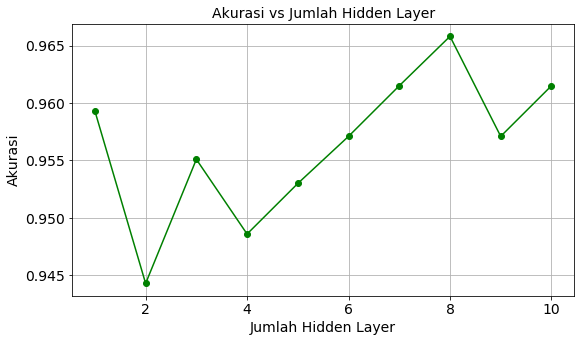

In [54]:
figure = plt.figure(figsize=(9,5))
plt.plot(hiddenLayer, accuracy, marker='o', color='green')
plt.title("Akurasi vs Jumlah Hidden Layer",fontsize=14)
plt.xlabel('Jumlah Hidden Layer',fontsize=14)
plt.ylabel('Akurasi',fontsize=14)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.legend(prop={'size':14})
plt.grid()
plt.show()